In [7]:
import pandas as pd
import os
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from colorspacious import cspace_convert
import colorsys

In [8]:
!rm -rf `find -L -type d -name .ipynb_checkpoints`

In [9]:
path=r'allmotion'
folder=os.listdir(path)
folder.sort()

In [10]:
def motionread(pathm,filesm):
    filesm.sort()
    motionx=np.zeros(93632*len(filesm))
    motiony=np.zeros(93632*len(filesm))
    motionz=np.zeros(93632*len(filesm))
    motionm=np.zeros(93632*len(filesm))
    for i in range(len(filesm)):
        df = pd.read_csv(pathm+'/'+filesm[i], skiprows=18, header=None, sep=r'\s+')
        column_names=['time','gx','gy','gz','ax','ay','az']
        df.columns = column_names
        xx=np.zeros(93632)
        xx[:len(df['ax'])]=np.array(df['ax'])
        yy=np.zeros(93632)
        yy[:len(df['ay'])]=np.array(df['ay'])
        zz=np.zeros(93632)
        zz[:len(df['az'])]=np.array(df['az'])
        motionx[i*93632:(i+1)*93632]=xx
        motiony[i*93632:(i+1)*93632]=yy
        motionz[i*93632:(i+1)*93632]=zz
        output=np.c_[motionx,motiony, motionz]
    motionm=(motionx**2+motiony**2+motionz**2)**0.5
    return output,motionm

In [11]:
def motionreadg(pathm,filesm):
    filesm.sort()
    motionx=np.zeros(93632*len(filesm))
    motiony=np.zeros(93632*len(filesm))
    motionz=np.zeros(93632*len(filesm))
    motionm=np.zeros(93632*len(filesm))
    for i in range(len(filesm)):
        df = pd.read_csv(pathm+'/'+filesm[i], skiprows=18, header=None, sep=r'\s+')
        column_names=['time','gx','gy','gz','ax','ay','az']
        df.columns = column_names
        xx=np.zeros(93632)
        xx[:len(df['gx'])]=np.array(df['gx'])
        yy=np.zeros(93632)
        yy[:len(df['gy'])]=np.array(df['gy'])
        zz=np.zeros(93632)
        zz[:len(df['gz'])]=np.array(df['gz'])
        motionx[i*93632:(i+1)*93632]=xx
        motiony[i*93632:(i+1)*93632]=yy
        motionz[i*93632:(i+1)*93632]=zz
        output=np.c_[motionx,motiony, motionz]
    motionm=(motionx**2+motiony**2+motionz**2)**0.5
    return output,motionm

In [13]:
all_dataa = []
all_datag = []
all_labels = []
all_scorea = []
all_scoreg = []
sample_rate = 52  # Replace with the actual sample rate
for i in range(len(folder)):
    files=os.listdir(path+'/'+folder[i])
    pathin=str(path+'/'+folder[i])
    print(pathin)
    raw_data,scorea=motionread(pathin,files)
    raw_datag,scoreg=motionreadg(pathin,files)
    meang=np.mean(raw_datag,axis=0)
    raw_datagin=raw_datag-meang   
    #print(raw_data)
    all_dataa.extend(raw_data)
    all_datag.extend(raw_datagin)
    all_labels.extend([folder[i]] * len(raw_data))
    all_scorea.extend(scorea)
    all_scoreg.extend(scoreg)
    #print(len(raw_data),len(all_dataa),all_labels[-1])

allmotion/12439
allmotion/12457
allmotion/12507
allmotion/12617
allmotion/12655
allmotion/12683
allmotion/12685
allmotion/12726
allmotion/12754
allmotion/12762
allmotion/12805
allmotion/12806
allmotion/12812
allmotion/12813
allmotion/12814
allmotion/12815
allmotion/12816
allmotion/12819
allmotion/12820
allmotion/12833
allmotion/12913
allmotion/18457
allmotion/18507
allmotion/18660
allmotion/18683
allmotion/18726
allmotion/18805
allmotion/18806
allmotion/18811
allmotion/6439
allmotion/6457
allmotion/6507
allmotion/6617
allmotion/6658
allmotion/6660
allmotion/6746
allmotion/6753
allmotion/6754
allmotion/6762
allmotion/6768
allmotion/6770
allmotion/6802
allmotion/6806
allmotion/6808
allmotion/6809
allmotion/6810
allmotion/6811
allmotion/6812
allmotion/6813
allmotion/6816
allmotion/6819
allmotion/6820
allmotion/6821
allmotion/6833
allmotion/6913
allmotion/9439
allmotion/9457
allmotion/9507
allmotion/9617
allmotion/9635
allmotion/9645
allmotion/9655
allmotion/9658
allmotion/9660
allmotion/9

In [14]:
data_acc=np.array(all_dataa)
data_gyo=np.array(all_datag)

In [25]:
data_scaorea=np.array(all_scorea)
data_scaoreg=np.array(all_scoreg)

In [30]:
fft_results = np.fft.fft(data_scaorea)
freqs = np.fft.fftfreq(len(data_scaorea), d=1/sample_rate)

In [33]:
fft_resultsg = np.fft.fft(data_scaoreg)
freqsg = np.fft.fftfreq(len(data_scaoreg), d=1/sample_rate)

In [15]:
fft_result = np.fft.fft(data_acc[:,0])
freq = np.fft.fftfreq(len(data_acc[:,0]), d=1/sample_rate)

In [21]:
fft_resulty = np.fft.fft(data_acc[:,1])
freqy = np.fft.fftfreq(len(data_acc[:,1]), d=1/sample_rate)

In [22]:
fft_resultz = np.fft.fft(data_acc[:,2])
freqz = np.fft.fftfreq(len(data_acc[:,2]), d=1/sample_rate)

In [34]:
fft_resultg = np.fft.fft(data_gyo[:,0])
freqg = np.fft.fftfreq(len(data_gyo[:,0]), d=1/sample_rate)

In [35]:
fft_resultyg = np.fft.fft(data_gyo[:,1])
freqyg = np.fft.fftfreq(len(data_gyo[:,1]), d=1/sample_rate)

In [36]:
fft_resultzg = np.fft.fft(data_gyo[:,2])
freqzg = np.fft.fftfreq(len(data_gyo[:,2]), d=1/sample_rate)

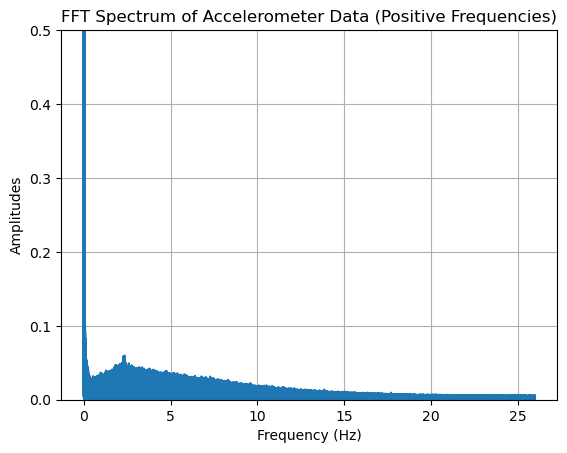

In [40]:
plt.plot(freqs[:len(freqs)//2], 2.0/len(data_scaorea) * np.abs(fft_results[:len(freqs)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudes')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

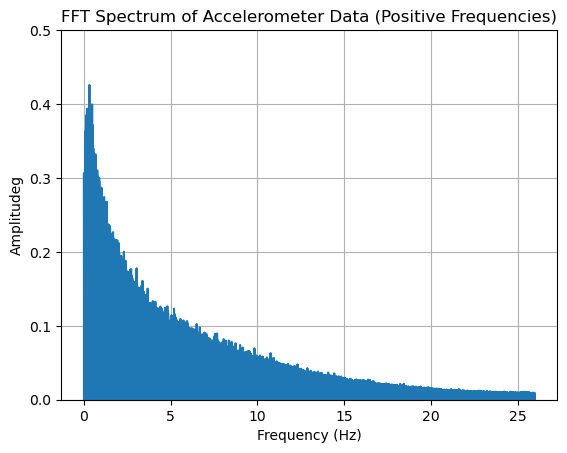

In [49]:
plt.plot(freqs[:len(freqg)//2], 2.0/len(data_scaoreg) * np.abs(fft_resultg[:len(freqg)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudeg')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

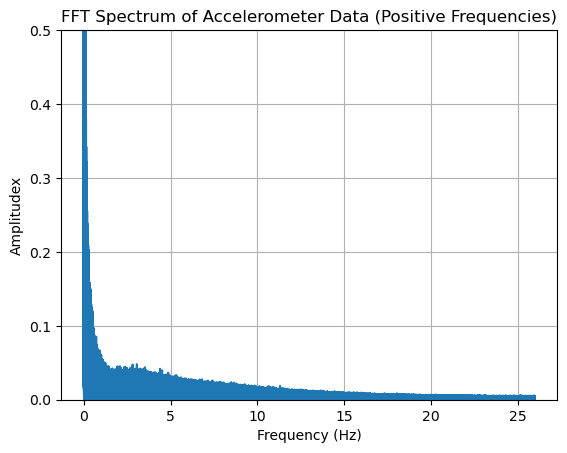

In [41]:
plt.plot(freq[:len(freq)//2], 2.0/len(data_acc[:,0]) * np.abs(fft_result[:len(freq)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudex')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

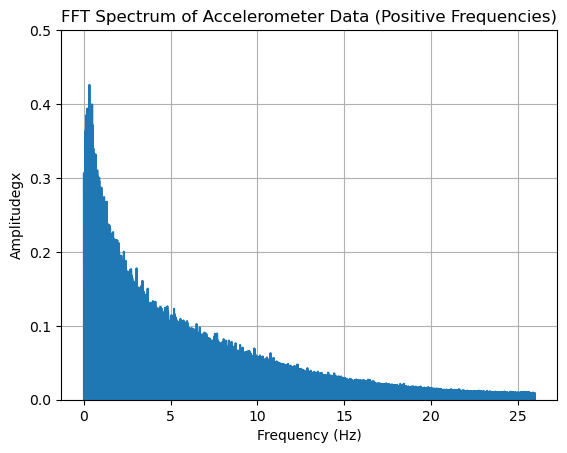

In [54]:
plt.plot(freqg[:len(freqg)//2], 2.0/len(data_gyo[:,0]) * np.abs(fft_resultg[:len(freqg)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudegx')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

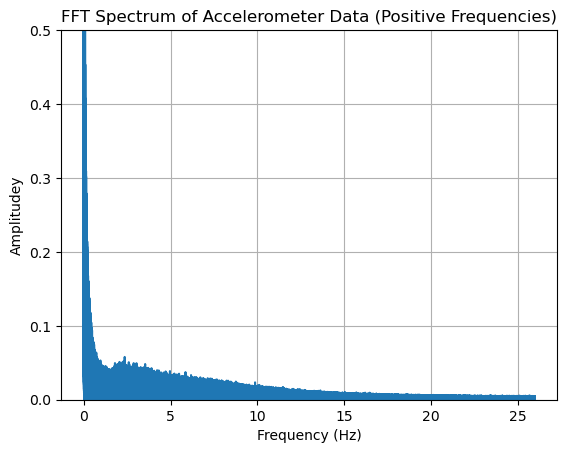

In [42]:
plt.plot(freq[:len(freqy)//2], 2.0/len(data_acc[:,1]) * np.abs(fft_resulty[:len(freqy)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudey')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

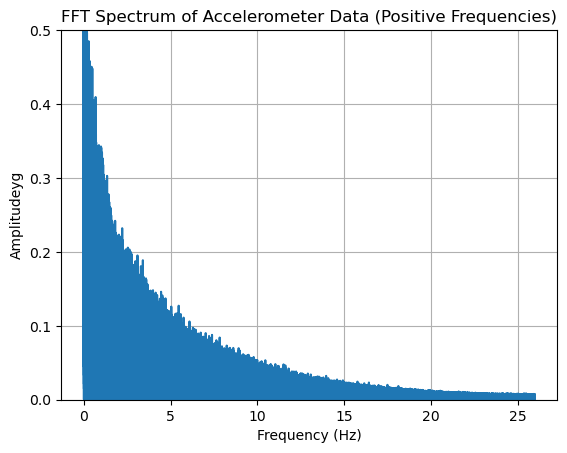

In [55]:
plt.plot(freqyg[:len(freqyg)//2], 2.0/len(data_gyo[:,1]) * np.abs(fft_resultyg[:len(freqyg)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudeyg')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

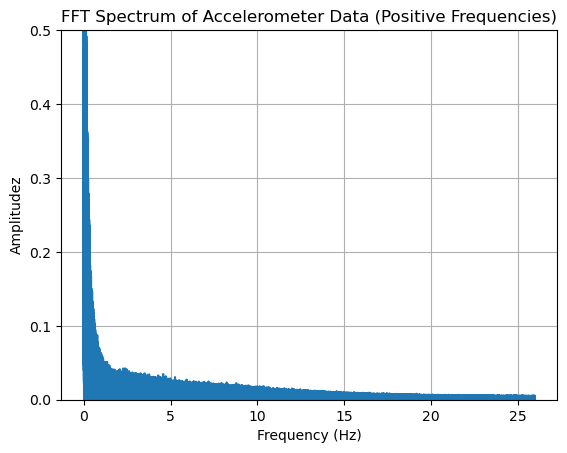

In [43]:
plt.plot(freq[:len(freqz)//2], 2.0/len(data_acc[:,2]) * np.abs(fft_resultz[:len(freqz)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudez')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

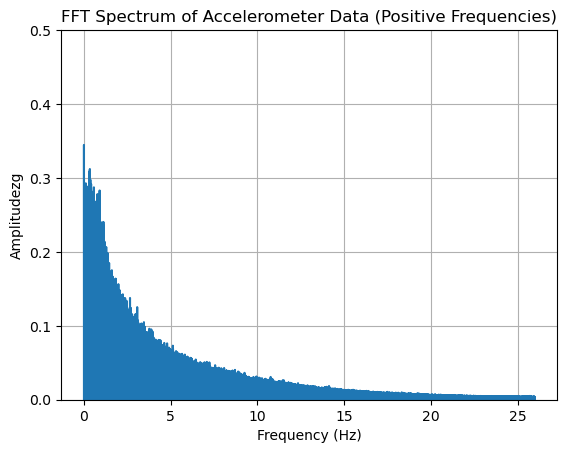

In [56]:
plt.plot(freqzg[:len(freqzg)//2], 2.0/len(data_gyo[:,2]) * np.abs(fft_resultzg[:len(freqzg)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitudezg')
plt.title('FFT Spectrum of Accelerometer Data (Positive Frequencies)')
plt.grid(True)
#plt.xlim(20,30)
plt.ylim(0,0.5)
plt.show()

In [26]:
from scipy.signal import periodogram
from scipy.signal import welch

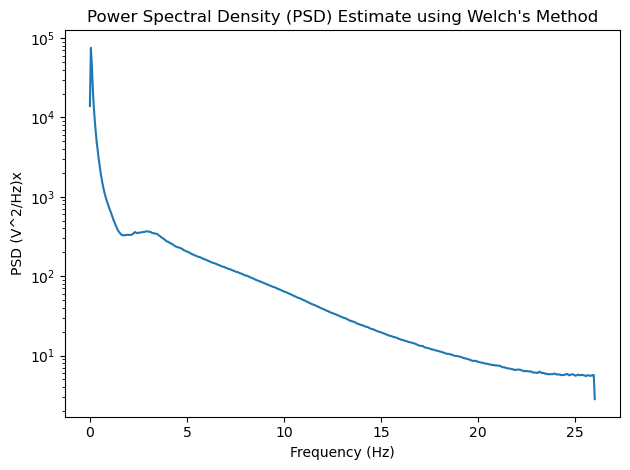

In [44]:
frequencies, psd_values = welch(data_acc[:,0], sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)x')
plt.tight_layout()
plt.show()

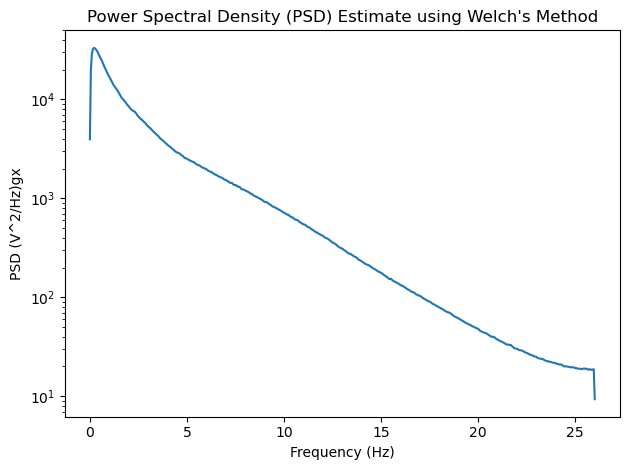

In [57]:
frequencies, psd_values = welch(data_gyo[:,0], sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)gx')
plt.tight_layout()
plt.show()

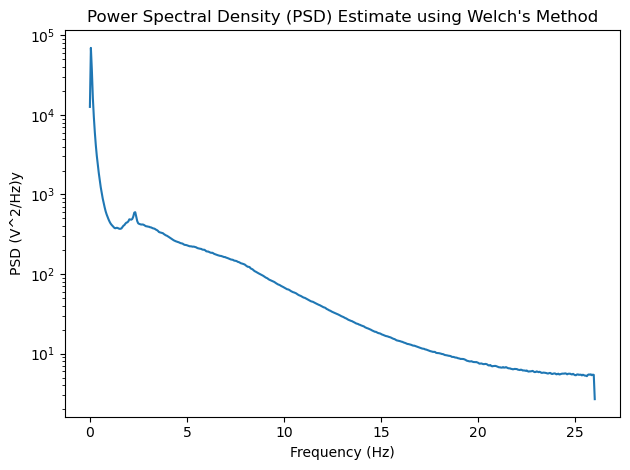

In [45]:
frequencies, psd_values = welch(data_acc[:,1], sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)y')
plt.tight_layout()
plt.show()

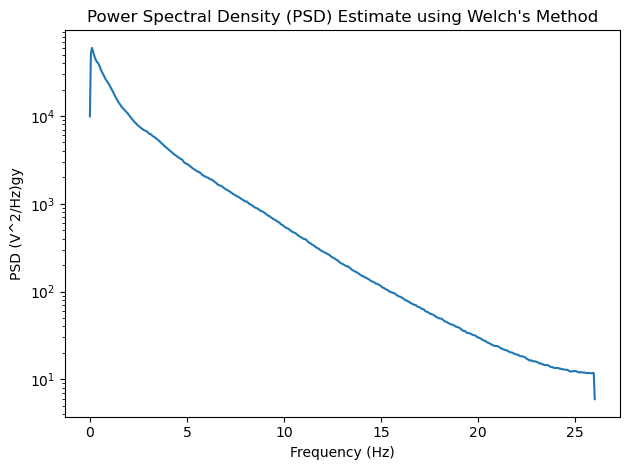

In [58]:
frequencies, psd_values = welch(data_gyo[:,1], sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)gy')
plt.tight_layout()
plt.show()

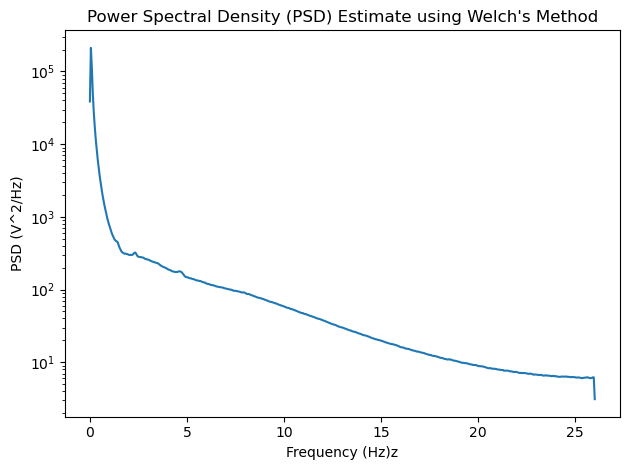

In [46]:
frequencies, psd_values = welch(data_acc[:,2], sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)z')
plt.ylabel('PSD (V^2/Hz)')
plt.tight_layout()
plt.show()

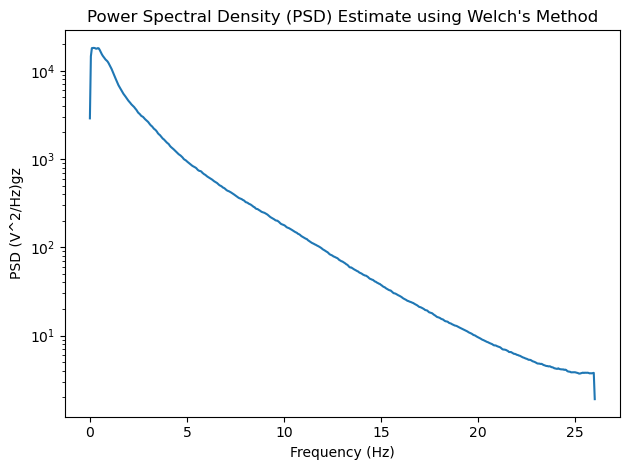

In [59]:
frequencies, psd_values = welch(data_gyo[:,2], sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)gz')
plt.tight_layout()
plt.show()

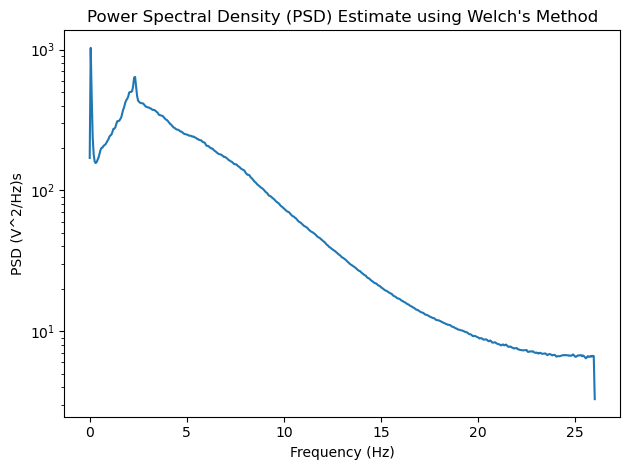

In [47]:
frequencies, psd_values = welch(data_scaorea, sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)s')
plt.tight_layout()
plt.show()

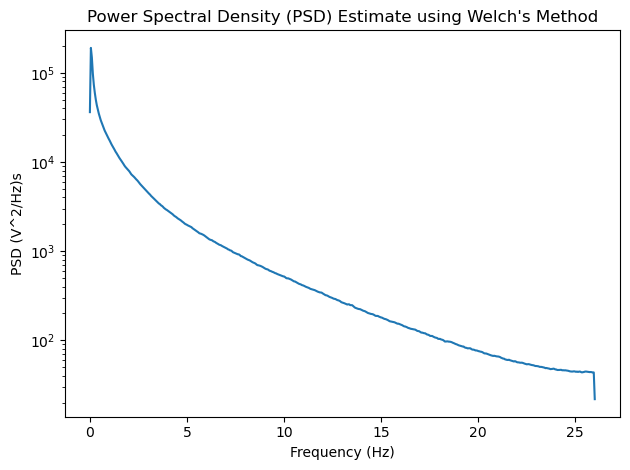

In [60]:
frequencies, psd_values = welch(data_scaoreg, sample_rate, nperseg=1024)

# Plotting the estimated PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) Estimate using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)s')
plt.tight_layout()
plt.show()